# Datos entreneamiento Shift PM10

En este notebook vamos a aplicar el shift para las obtener las columnas mas correlacionadas.

- __Datos recibidos:__ obtenidos de notebook __1-datos_entrenamiento_shift.ipynb__
- __Responsable:__ Daniel Bustillos
- __Contacto:__  juandaniel.bucam@gmail.com

__Notas del proyecto__
Necesitamos generar un csv con los niveles máximos, mínimo y promedio por día, se perderá la información de la estación, también generaremos el atributo PM10mean y PM25mean que representarán los valores de las últimas 24 horas de los contaminantes.

calidad de caire
pronostico contaminación

## Pasos
[X] Aplicar Shift con Correlaciones <br>
[X] Sacar minimo promedio y maximo <br>
[X] Obtener columnas más correlacionadas<br><br>

In [81]:
import pandas as pd
pd.options.mode.chained_assignment = None 

In [82]:
path_inicial = "./datos/ingesta_hora_limpios.csv"
path_final = "./datos/ingesta_modelos_PM10.csv"

In [83]:
data_hour_merge_24 = pd.read_csv(path_inicial)

In [84]:
data_hour_merge_24.head()

,CO,NO,NO2,NOX,O3,PM10,PM2.5,RH,SO2,TMP,WDR,WSP,dia,fecha,hora,id_station,mes,PM10mean,PM25mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,NaN,16.0,37.0,1.3,1,2019-08-01 01:00:00,1,ACO,8,NaN,NaN
1,0.1,2.0,7.0,8.0,22.0,19.0,10.0,71.0,1.0,15.0,265.0,1.9,1,2019-08-01 01:00:00,1,AJM,8,NaN,NaN
2,NaN,NaN,NaN,NaN,23.0,NaN,5.0,NaN,NaN,8.0,196.0,1.1,1,2019-08-01 01:00:00,1,AJU,8,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2019-08-01 01:00:00,1,ARA,8,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2019-08-01 01:00:00,1,ATI,8,NaN,NaN


Quedémonos sin WSR:

In [85]:
data_hour_merge_24 = data_hour_merge_24[['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', "PM2.5",'RH', 'SO2', 'TMP',
       'WSP', 'dia', 'fecha', 'hora', 'id_station', 'mes',"PM10mean","PM25mean"]].reset_index(drop=True)

Hagamos una lista con todas las estaciones:

### Arreglemos las fechas:

In [86]:
data_hour_merge_24['dia'] = data_hour_merge_24['dia'].astype(str).astype(float)
data_hour_merge_24['mes'] = data_hour_merge_24['mes'].astype(str).astype(float)

In [87]:
estaciones = data_hour_merge_24.id_station.unique().tolist()

In [88]:
data_est = {}
for elem in estaciones:
    data_est[elem] = data_hour_merge_24[data_hour_merge_24.id_station == elem]

# Leamos el archivo de correlaciones del PM10 mean

Este archivo se generó en el notebook: __/home/paw/DanielBustillos/contaminación/correlaciones_pau/correlaciones_función_paulina.ipynb__

In [89]:
target = "PM10mean_y"

O3_corr = pd.read_csv("/DATA/paw/jupyterhub_notebook/daniel.bustillos/DanielBustillos/contaminación/pipeline-norberto/correlacion"+
                      "/correlaciones_"+ target +".csv")
O3_corr = O3_corr.iloc[:,1:]

In [90]:
O3_corr.valor.min()

-0.42706242493161295

Vamos a quedarnos con las variables con corr>0.66:

In [91]:
O3_corr_filtro = O3_corr

In [92]:
O3_corr_filtro = O3_corr[(O3_corr.valor>0.46) | (O3_corr.valor<-0.46) ].reset_index(drop=True)

Vamos a aplicar el shift para cada elemento de la tabla __O3_corr__:

In [93]:
def shit_corr(df):
    for i in range(len(O3_corr_filtro)):
        name_column = str( O3_corr_filtro.loc[i,"contaminante"] + "_" + str( O3_corr_filtro.loc[i,"horas"] ) ) 
        df[name_column] = df[O3_corr_filtro.loc[i,"contaminante"]].shift( int(float(str(O3_corr_filtro.loc[i,"horas"]))) ) 
    return df.dropna()

Aplicamos esta función para cada DF de cada estación:

In [94]:
data_shift = {}
for elem in data_est:
    data_shift[elem] = shit_corr(data_est[elem])

In [95]:
df_append = pd.DataFrame(columns = data_est["MER"].columns.tolist())

In [96]:
for key in data_est:
    df_append = df_append.append(data_est[key], ignore_index=True,sort=True)

In [97]:
df_append.columns.tolist()

['CO',
 'NO',
 'NO2',
 'NO2_0.0',
 'NO2_1.0',
 'NO2_10.0',
 'NO2_11.0',
 'NO2_12.0',
 'NO2_13.0',
 'NO2_14.0',
 'NO2_15.0',
 'NO2_16.0',
 'NO2_17.0',
 'NO2_18.0',
 'NO2_19.0',
 'NO2_2.0',
 'NO2_20.0',
 'NO2_21.0',
 'NO2_22.0',
 'NO2_23.0',
 'NO2_24.0',
 'NO2_25.0',
 'NO2_26.0',
 'NO2_27.0',
 'NO2_3.0',
 'NO2_4.0',
 'NO2_5.0',
 'NO2_6.0',
 'NO2_7.0',
 'NO2_8.0',
 'NO2_9.0',
 'NOX',
 'O3',
 'PM10',
 'PM10_0.0',
 'PM10_1.0',
 'PM10_10.0',
 'PM10_11.0',
 'PM10_12.0',
 'PM10_13.0',
 'PM10_14.0',
 'PM10_15.0',
 'PM10_16.0',
 'PM10_17.0',
 'PM10_18.0',
 'PM10_19.0',
 'PM10_2.0',
 'PM10_20.0',
 'PM10_21.0',
 'PM10_22.0',
 'PM10_23.0',
 'PM10_24.0',
 'PM10_25.0',
 'PM10_26.0',
 'PM10_27.0',
 'PM10_28.0',
 'PM10_29.0',
 'PM10_3.0',
 'PM10_30.0',
 'PM10_31.0',
 'PM10_32.0',
 'PM10_33.0',
 'PM10_34.0',
 'PM10_35.0',
 'PM10_36.0',
 'PM10_37.0',
 'PM10_38.0',
 'PM10_39.0',
 'PM10_4.0',
 'PM10_40.0',
 'PM10_41.0',
 'PM10_42.0',
 'PM10_43.0',
 'PM10_44.0',
 'PM10_5.0',
 'PM10_6.0',
 'PM10_7.0',
 'PM10

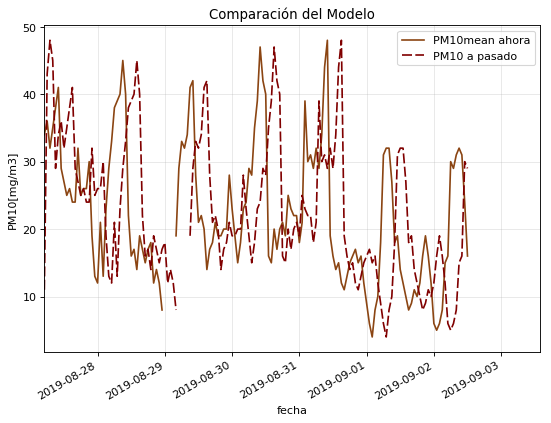

In [98]:
df_append['fecha'] =  pd.to_datetime(df_append['fecha'], format='%Y-%m-%d %H:%M')

import matplotlib.pyplot as plt

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()

df_append.tail(200).plot(x="fecha", y=['NO2_0.0'],ax=ax,label=["PM10mean ahora"],color="saddlebrown")
df_append.tail(200).plot(x="fecha", y=['NO2_5.0'],ax=ax,label=["PM10 a pasado"],color='maroon',dashes=[6, 2])
plt.ylabel("PM10[mg/m3]")
plt.title("Comparación del Modelo")


# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.01)
ax.grid(which='major', alpha=0.3)



plt.legend()
plt.show()

## Groupbys

In [99]:
cols = df_append.columns.tolist()

In [100]:
#cols.remove("id_station")
cols.remove("fecha")

Finalmente, aplicamos los groupbys:

In [101]:
data_hour_merge_24_mean = df_append.groupby('fecha')[cols].mean()
data_hour_merge_24_mean.reset_index(inplace=True)

In [102]:
data_hour_merge_24_max = df_append.groupby('fecha')[cols].max()
data_hour_merge_24_max.reset_index(inplace=True)

In [103]:
data_hour_merge_24_min = df_append.groupby('fecha')[cols].min()
data_hour_merge_24_min.reset_index(inplace=True)

### Arreglemos los nombres:

In [104]:
max_columns = data_hour_merge_24_max.columns.tolist()
min_columns = data_hour_merge_24_min.columns.tolist()
mean_columns = data_hour_merge_24_mean.columns.tolist()

In [105]:
for i in range(len(max_columns)):
    if max_columns[i] not in ['fecha','hora','dia','mes','id_station']:
        max_columns[i] = max_columns[i]+"_max"
        min_columns[i] = min_columns[i]+"_min"    
        mean_columns[i] = mean_columns[i]+"_mean"

In [106]:
data_hour_merge_24_mean.columns = mean_columns
data_hour_merge_24_min.columns = min_columns
data_hour_merge_24_max.columns = max_columns

In [107]:
data_hour_merge_24_max.head()

,fecha,CO_max,NO_max,NO2_max,NO2_0.0_max,NO2_1.0_max,NO2_10.0_max,NO2_11.0_max,NO2_12.0_max,NO2_13.0_max,...,PM25mean_8.0_max,PM25mean_9.0_max,RH_max,SO2_max,TMP_max,WSP_max,dia,hora,id_station,mes
0,2019-08-01 01:00:00,0.80,5.0,30.0,30.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,82.0,2.0,17.0,3.4,1.0,1,XAL,8.0
1,2019-08-01 02:00:00,0.56,6.0,36.0,36.0,30.0,NaN,NaN,NaN,NaN,...,NaN,NaN,84.0,2.0,17.0,3.8,1.0,2,XAL,8.0
2,2019-08-01 03:00:00,0.58,14.0,32.0,32.0,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,89.0,3.0,16.0,3.2,1.0,3,XAL,8.0
3,2019-08-01 04:00:00,0.56,26.0,31.0,31.0,32.0,NaN,NaN,NaN,NaN,...,NaN,NaN,92.0,6.0,16.0,2.6,1.0,4,XAL,8.0
4,2019-08-01 05:00:00,1.01,58.0,41.0,41.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,94.0,12.0,15.0,2.2,1.0,5,XAL,8.0


##### Unamos los df's de manera que tengamos en una solo los datos promedio, máximo y minimo por día:

In [108]:
data_hour_merge = pd.merge(data_hour_merge_24_mean, data_hour_merge_24_max, on=['fecha'])
data_hour_merge = pd.merge(data_hour_merge, data_hour_merge_24_min, on=['fecha'])
data_hour_merge = data_hour_merge.sort_values(['fecha',"hora_x"], ascending=[0,1])

In [109]:
data_hour_merge.head()

,fecha,CO_mean,NO_mean,NO2_mean,NO2_0.0_mean,NO2_1.0_mean,NO2_10.0_mean,NO2_11.0_mean,NO2_12.0_mean,NO2_13.0_mean,...,PM25mean_8.0_min,PM25mean_9.0_min,RH_min,SO2_min,TMP_min,WSP_min,dia,hora_y,id_station_y,mes
803,2019-09-03 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,23.0,8.0,3.0,14,pronos,9.0
802,2019-09-03 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,21.0,9.0,3.0,13,pronos,9.0
801,2019-09-03 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,20.0,10.0,3.0,12,pronos,9.0
800,2019-09-03 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,18.0,9.0,3.0,11,pronos,9.0
799,2019-09-03 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,17.0,7.0,3.0,10,pronos,9.0


## Correlacionados con el target.

Ahora vamos a sacar los atributos más correlacionado con el target, el target es la columna a pronosticar, por simplicidad solo vamos a sacar la correlación con target a las 12 horas:

Generemos los target de pronóstico:

Filtremos el DF con las variables mas correlacionadas:

In [110]:
O3_corr = ['PM10mean_1.0_max',  'PM10_9.0_mean',  'PM10_max',  'PM10_6.0_mean',  'PM10mean_4.0_mean',  'PM25mean_8.0_max',  'PM10mean_2.0_max',  'PM25mean_0.0_mean',  'PM10mean_11.0_mean',  'PM10mean_13.0_mean',  'PM10_2.0_mean',  'PM10_13.0_mean',  'PM10_3.0_mean',  'PM10mean_28.0_max',  'PM25mean_1.0_max',  'PM10mean_26.0_mean',  'PM10mean_10.0_mean',  'PM10mean_7.0_mean',  'PM10mean_16.0_mean',  'PM10mean_20.0_mean',  'PM10mean_4.0_max',  'PM10mean_29.0_max',  'PM10mean_5.0_max',  'PM25mean_2.0_max',  'PM25mean_5.0_mean',  'PM10mean_9.0_max',  'PM25mean_4.0_max',  'PM10mean_19.0_max',  'PM25mean_4.0_mean',  'PM10mean_10.0_max',  'PM2.5_mean',  'PM25mean_max',  'PM10_7.0_max',  'PM10_7.0_mean',  'PM25mean_12.0_max',  'PM10mean_24.0_max',  'PM10_8.0_max',  'PM10mean_25.0_mean',  'PM10_3.0_max',  'PM10mean_14.0_max',  'PM10mean_30.0_mean',  'PM25mean_13.0_max',  'PM10_0.0_mean',  'PM10mean_24.0_mean',  'PM10mean_max',  'PM10mean_25.0_max',  'PM10_6.0_max',  'PM10mean_23.0_max',  'PM25mean_3.0_max',  'PM25mean_0.0_max',  'PM10mean_5.0_mean',  'PM10_14.0_mean',  'PM10mean_14.0_mean',  'PM10mean_18.0_max',  'PM25mean_3.0_mean',  'PM10mean_31.0_mean',  'PM10mean_26.0_max',  'PM25mean_6.0_max',  'PM10mean_9.0_mean',  'PM10mean_22.0_mean',  'PM25mean_2.0_mean',  'PM10mean_11.0_max',  'PM10_16.0_mean',  'PM10mean_mean',  'PM25mean_1.0_mean',  'PM10_10.0_mean',  'PM10_1.0_mean',  'PM10mean_22.0_max',  'PM10mean_27.0_max',  'PM10mean_12.0_max',  'PM25mean_5.0_max',  'PM10mean_21.0_max',  'PM10_5.0_mean',  'PM10mean_0.0_max',  'PM10_4.0_mean',  'PM25mean_9.0_max',  'PM10mean_17.0_max',  'PM10mean_18.0_mean',  'PM10mean_28.0_mean',  'PM10_1.0_max',  'PM10_4.0_max',  'PM10mean_17.0_mean',  'NO2_mean',  'PM25mean_mean',  'PM10mean_0.0_mean',  'PM10_2.0_max',  'PM10mean_6.0_mean',  'PM25mean_10.0_max',  'PM10mean_20.0_max',  'PM10mean_19.0_mean',  'PM10mean_29.0_mean',  'PM10_15.0_mean',  'PM10mean_1.0_mean',  'PM10mean_3.0_max',  'PM25mean_7.0_max',  'PM25mean_11.0_max',  'PM10mean_8.0_max',  'PM10_0.0_max',  'PM10mean_16.0_max',  'PM10mean_13.0_max',  'PM10_5.0_max',  'PM10_11.0_mean',  'PM10mean_15.0_mean',  'PM10mean_23.0_mean',  'PM10mean_27.0_mean',  'PM10mean_8.0_mean',  'PM10mean_2.0_mean',  'PM10mean_12.0_mean',  'PM10_8.0_mean',  'PM10mean_21.0_mean',  'PM10_12.0_mean',  'PM10mean_15.0_max',  'PM10_mean',  'PM10mean_6.0_max',  'PM10mean_3.0_mean',  'PM10mean_7.0_max']

In [111]:
O3_corr.append("fecha")

Añadamos los datos de pronostico de las siguientes variables:

In [112]:
lista_frcst = ["RH_mean","WSP_mean","TMP_mean"]

In [113]:
for item in lista_frcst:
    for i in range(1, 25):
        col_name = str(item+"_frcst_"+str(i))
        data_hour_merge[col_name] = data_hour_merge[item].shift(i)

In [114]:
data_hour_merge = data_hour_merge[O3_corr]

In [115]:
data_hour_merge.head()

,PM10mean_1.0_max,PM10_9.0_mean,PM10_max,PM10_6.0_mean,PM10mean_4.0_mean,PM25mean_8.0_max,PM10mean_2.0_max,PM25mean_0.0_mean,PM10mean_11.0_mean,PM10mean_13.0_mean,...,PM10mean_12.0_mean,PM10_8.0_mean,PM10mean_21.0_mean,PM10_12.0_mean,PM10mean_15.0_max,PM10_mean,PM10mean_6.0_max,PM10mean_3.0_mean,PM10mean_7.0_max,fecha
803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-03 14:00:00
802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-03 13:00:00
801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-03 12:00:00
800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-03 11:00:00
799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-03 10:00:00


In [116]:
data_hour_merge = data_hour_merge.head(124)
#data_hour_merge = data_hour_merge.fillna(data_hour_merge.mean())

Guardemos:

In [117]:
data_hour_merge.tail(-60).to_csv(path_final,sep=',', encoding='utf-8',index=False)

In [118]:
data_hour_merge.tail(-60)

,PM10mean_1.0_max,PM10_9.0_mean,PM10_max,PM10_6.0_mean,PM10mean_4.0_mean,PM25mean_8.0_max,PM10mean_2.0_max,PM25mean_0.0_mean,PM10mean_11.0_mean,PM10mean_13.0_mean,...,PM10mean_12.0_mean,PM10_8.0_mean,PM10mean_21.0_mean,PM10_12.0_mean,PM10mean_15.0_max,PM10_mean,PM10mean_6.0_max,PM10mean_3.0_mean,PM10mean_7.0_max,fecha
743,50.875000,30.923077,85.0,26.615385,38.708333,17.041667,51.125000,15.302083,37.141667,39.437500,...,39.572917,25.571429,32.708333,33.153846,44.416667,35.142857,52.583333,38.781250,52.875000,2019-09-01 00:00:00
742,51.125000,26.500000,94.0,26.153846,35.891667,17.666667,51.208333,15.052083,39.572917,39.583333,...,39.437500,30.923077,32.541667,43.230769,44.125000,34.071429,52.875000,38.708333,53.083333,2019-08-31 23:00:00
741,51.208333,33.142857,52.0,25.571429,34.770833,17.916667,51.541667,15.166667,39.437500,33.125000,...,39.583333,26.500000,32.333333,41.416667,43.291667,33.615385,53.083333,35.891667,53.625000,2019-08-31 22:00:00
740,51.541667,33.153846,53.0,30.923077,35.236111,18.625000,52.083333,15.093750,39.583333,33.263889,...,33.125000,33.142857,31.902778,48.769231,43.041667,36.285714,53.625000,34.770833,53.958333,2019-08-31 21:00:00
739,52.083333,43.230769,61.0,26.500000,34.375000,18.416667,52.583333,14.958333,33.125000,33.000000,...,33.263889,33.153846,31.805556,41.714286,42.625000,32.307692,53.958333,35.236111,54.916667,2019-08-31 20:00:00
738,52.583333,41.416667,78.0,33.142857,36.416667,18.625000,52.875000,14.466667,33.263889,32.763889,...,33.000000,43.230769,31.527778,33.733333,42.125000,29.166667,54.916667,34.375000,57.250000,2019-08-31 19:00:00
737,52.875000,48.769231,44.0,33.153846,36.575000,18.416667,53.083333,14.333333,33.000000,32.666667,...,32.763889,41.416667,33.395833,25.333333,42.041667,26.615385,57.250000,36.416667,59.375000,2019-08-31 18:00:00
736,53.083333,41.714286,40.0,43.230769,37.141667,18.250000,53.625000,14.652778,32.763889,32.847222,...,32.666667,48.769231,33.541667,29.714286,42.000000,26.153846,59.375000,36.575000,59.333333,2019-08-31 17:00:00
735,53.625000,33.733333,53.0,41.416667,39.572917,18.291667,53.958333,15.297619,32.666667,32.708333,...,32.847222,41.714286,33.791667,28.928571,42.125000,25.571429,59.333333,37.141667,44.416667,2019-08-31 16:00:00
734,53.958333,25.333333,60.0,48.769231,39.437500,17.750000,54.916667,16.216667,32.847222,32.541667,...,32.708333,33.733333,33.729167,29.642857,41.416667,30.923077,44.416667,39.572917,44.125000,2019-08-31 15:00:00
